# Proyek Analisis Data: 

- Nama: Alessandro Javva Ananda Satriyo
- Email: alessandroryo@gmail.com
- Username: alessandroryo 

<hr>

### Menentukan Pertanyaan Bisnis
- **Pertanyaan 1**: Bagaimana tingkat penggunaan sepeda berdasarkan hari kerja dan akhir pekan di Washington D.C. dengan dipengaruhi oleh kondisi cuaca?
- **Pertanyaan 2**: Bagaimana perubahan penggunaan sepeda sepanjang hari atau 24 jam dan apakah ada waktu-waktu puncak tertentu penyewaan sepeda di Washington D.C.?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset day.csv
day_df = pd.read_csv('./data/day.csv')

# Load dataset hour.csv
hour_df = pd.read_csv('./data/hour.csv')

### Assessing Data

#### Tipe Data

In [3]:
# Memeriksa tipe data dari setiap kolom pada dataset day.csv
print("Tipe Data Dataset Day.csv:")
print(day_df.dtypes)


Tipe Data Dataset Day.csv:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [4]:
# Memeriksa tipe data dari setiap kolom pada dataset hour.csv
print("Tipe Data Dataset Hour.csv:")
print(hour_df.dtypes)


Tipe Data Dataset Hour.csv:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


#### Missing Values

In [5]:
# Memeriksa missing values dalam dataset day.csv
missing_values_day = day_df.isnull().sum()
print("Missing Values in Day.csv:")
print(missing_values_day)

Missing Values in Day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
# Memeriksa missing values dalam dataset hour.csv
missing_values_hour = hour_df.isnull().sum()
print("Missing Values in Hour.csv:")
print(missing_values_hour)

Missing Values in Hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### Invalid Value

In [7]:
# Memeriksa nilai yang aneh pada dataset day.csv
invalid_values_day = {
    'season': day_df[~day_df['season'].between(1, 4)],
    'mnth': day_df[~day_df['mnth'].between(1, 12)],
    'weathersit': day_df[~day_df['weathersit'].between(1, 4)],
    'temp': day_df[~day_df['temp'].between(0, 1)],
    'atemp': day_df[~day_df['atemp'].between(0, 1)],
    'hum': day_df[~day_df['hum'].between(0, 1)],
    'windspeed': day_df[~day_df['windspeed'].between(0, 1)]
}

# Menampilkan hasil deteksi nilai yang aneh pada dataset day.csv
print("Invalid Values in Day.csv:")
for key, value in invalid_values_day.items():
    if not value.empty:
        print(f"\nInvalid values in {key}:")
        print(value)

Invalid Values in Day.csv:


In [8]:
# Memeriksa nilai yang aneh pada dataset hour.csv
invalid_values_hour = {
    'season': hour_df[~hour_df['season'].between(1, 4)],
    'mnth': hour_df[~hour_df['mnth'].between(1, 12)],
    'hr': hour_df[~hour_df['hr'].between(0, 23)],
    'weathersit': hour_df[~hour_df['weathersit'].between(1, 4)],
    'temp': hour_df[~hour_df['temp'].between(0, 1)],
    'atemp': hour_df[~hour_df['atemp'].between(0, 1)],
    'hum': hour_df[~hour_df['hum'].between(0, 1)],
    'windspeed': hour_df[~hour_df['windspeed'].between(0, 1)]
}

# Menampilkan hasil deteksi nilai yang aneh pada dataset hour.csv
print("\nInvalid Values in Hour.csv:")
for key, value in invalid_values_hour.items():
    if not value.empty:
        print(f"\nInvalid values in {key}:")
        print(value)


Invalid Values in Hour.csv:


#### Duplicated Data

In [9]:
# Memeriksa duplikasi dalam dataset day.csv
print("Jumlah Duplikasi dalam Day.csv:")
print(day_df.duplicated().sum())


Jumlah Duplikasi dalam Day.csv:
0


In [10]:
# Memeriksa duplikasi dalam dataset hour.csv
print("Jumlah Duplikasi dalam Hour.csv:")
print(hour_df.duplicated().sum())


Jumlah Duplikasi dalam Hour.csv:
0


#### Inaccurate Values

In [11]:
# Memeriksa nilai yang tidak akurat pada dataset day.csv
# Karena suhu tidak mungkin di atas 1 atau di bawah 0, karena sudah dinormalisasi
inaccurate_temp_day = day_df[(day_df['temp'] > 1) | (day_df['temp'] < 0)]
if not inaccurate_temp_day.empty:
    print("Inaccurate Temperature Values in Day.csv:")
    print(inaccurate_temp_day)

# Memeriksa nilai yang tidak akurat pada dataset hour.csv
inaccurate_temp_hour = hour_df[(hour_df['temp'] > 1) | (hour_df['temp'] < 0)]
if not inaccurate_temp_hour.empty:
    print("Inaccurate Temperature Values in Hour.csv:")
    print(inaccurate_temp_hour)

#### Inconsistent Values

In [12]:
# Memeriksa inkonsistensi satuan pada dataset day.csv
# Misalnya, memastikan bahwa suhu selalu dinormalisasi dengan cara yang sama
inconsistent_temp_day = day_df[day_df['temp'] > 1]  # Nilai suhu tidak boleh lebih dari 1
if not inconsistent_temp_day.empty:
    print("Inconsistent Temperature Values in Day.csv:")
    print(inconsistent_temp_day)

# Memeriksa inkonsistensi satuan pada dataset hour.csv
inconsistent_temp_hour = hour_df[hour_df['temp'] > 1]  # Nilai suhu tidak boleh lebih dari 1
if not inconsistent_temp_hour.empty:
    print("Inconsistent Temperature Values in Hour.csv:")
    print(inconsistent_temp_hour)

In [13]:
# Membuat sebuah regex pattern untuk memeriksa format tanggal
# ^            : Menandakan awal dari string
# \d{4}        : Harus ada tepat empat digit (tahun) 
# -            : Diikuti oleh tanda hubung ('-')
# \d{2}        : Harus ada tepat dua digit (bulan)
# -            : Diikuti oleh tanda hubung ('-')
# \d{2}        : Harus ada tepat dua digit (hari)
# $            : Menandakan akhir dari string
date_format_regex = r'^\d{4}-\d{2}-\d{2}$'

# Memeriksa format tanggal yang konsisten pada dataset day.csv
inconsistent_date_day = day_df[~day_df['dteday'].str.match(date_format_regex)]
if not inconsistent_date_day.empty:
    print("Inconsistent Date Format in Day.csv:")
    print(inconsistent_date_day)

# Memeriksa format tanggal yang konsisten pada dataset hour.csv
inconsistent_date_hour = hour_df[~hour_df['dteday'].str.match(date_format_regex)]
if not inconsistent_date_hour.empty:
    print("Inconsistent Date Format in Hour.csv:")
    print(inconsistent_date_hour)

#### Data Unik

In [14]:
# Memeriksa nilai unik dari kolom season
print("Nilai Unik Kolom 'season' pada Day.csv:")
print(day_df['season'].unique())


Nilai Unik Kolom 'season' pada Day.csv:
[1 2 3 4]


In [15]:
print("Nilai Unik Kolom 'weathersit' pada Day.csv:")
print(day_df['weathersit'].unique())


Nilai Unik Kolom 'weathersit' pada Day.csv:
[2 1 3]


In [16]:
# Memeriksa nilai unik dari kolom hr
print("Nilai Unik Kolom 'hr' pada Hour.csv:")
print(hour_df['hr'].unique())


Nilai Unik Kolom 'hr' pada Hour.csv:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


#### Outlier

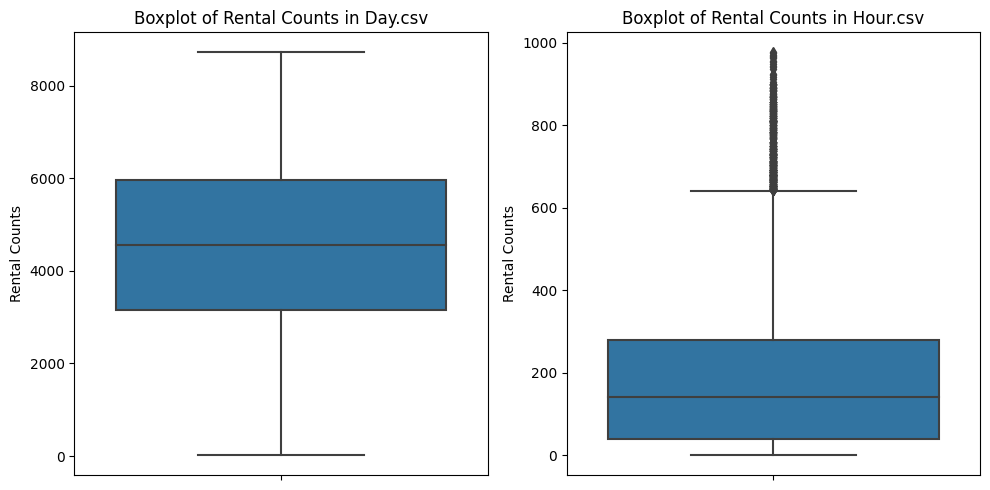

In [17]:
# Visualisasi box plot pada kolom 'cnt' di day.csv dan hour.csv
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=day_df['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda Harian')
plt.ylabel('Jumlah Penyewaan')

plt.subplot(1, 2, 2)
sns.boxplot(y=hour_df['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda Per Jam')
plt.ylabel('Jumlah Penyewaan')

plt.tight_layout()
plt.show()

### Cleaning Data

#### Mengatasi Missing Values

In [18]:
# Mengatasi Missing Values
day_df_cleaned = day_df.dropna()
hour_df_cleaned = hour_df.dropna()

# Mengisi missing values dengan mean untuk kolom numerik saja
numeric_columns_day = day_df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns_hour = hour_df.select_dtypes(include=['float64', 'int64']).columns

day_df_cleaned[numeric_columns_day] = day_df[numeric_columns_day].fillna(day_df[numeric_columns_day].mean())
hour_df_cleaned[numeric_columns_hour] = hour_df[numeric_columns_hour].fillna(hour_df[numeric_columns_hour].mean())

#### Menangani Invalid Values

In [19]:
day_df_cleaned = day_df_cleaned[(day_df_cleaned['temp'] >= 0) & (day_df_cleaned['temp'] <= 1)]
hour_df_cleaned = hour_df_cleaned[(hour_df_cleaned['temp'] >= 0) & (hour_df_cleaned['temp'] <= 1)]

#### Menangani Inconsistent Values

In [20]:
day_df_cleaned['dteday'] = pd.to_datetime(day_df_cleaned['dteday'], format='%Y-%m-%d')
hour_df_cleaned['dteday'] = pd.to_datetime(hour_df_cleaned['dteday'], format='%Y-%m-%d')

#### Menangani Outlier

In [21]:
# Mengidentifikasi dan mengatasi outliers dengan capping
def cap_outliers_iqr(df, column):
    """Mengatasi outliers dalam sebuah kolom menggunakan metode IQR dan capping"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    capped_column = df[column].copy()
    capped_column[capped_column < lower_bound] = lower_bound
    capped_column[capped_column > upper_bound] = upper_bound
    
    return capped_column

In [22]:
# Mengatasi outliers dalam kolom 'cnt' dan membuat kolom baru 'capped_cnt'
hour_df['capped_cnt'] = cap_outliers_iqr(hour_df, 'cnt')

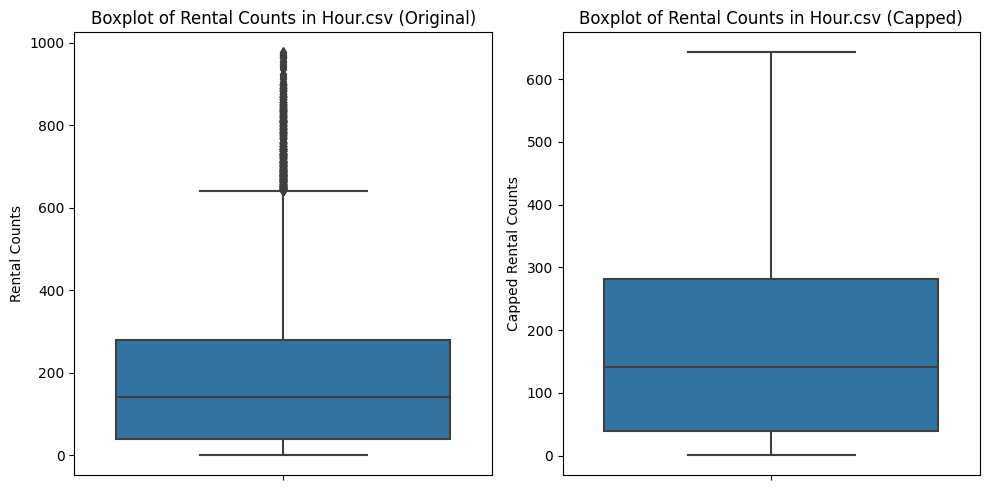

In [23]:
# Visualisasi menggunakan box plot untuk kolom asli dan kolom baru
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=hour_df['cnt'])
plt.title('Boxplot of Rental Counts in Hour.csv (Original)')
plt.ylabel('Rental Counts')

plt.subplot(1, 2, 2)
sns.boxplot(y=hour_df['capped_cnt'])
plt.title('Boxplot of Rental Counts in Hour.csv (Capped)')
plt.ylabel('Capped Rental Counts')

plt.tight_layout()
plt.show()

In [24]:
# Melihat perbedaan statistik deskriptif antara kolom asli dan kolom baru
print("Statistik Deskriptif untuk kolom 'cnt' (Original):")
print(hour_df['cnt'].describe())

print("Statistik Deskriptif untuk kolom 'capped_cnt' (Capped):")
print(hour_df['capped_cnt'].describe())

Statistik Deskriptif untuk kolom 'cnt' (Original):
count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

Statistik Deskriptif untuk kolom 'capped_cnt' (Capped):
count    17379.000000
mean       186.361327
std        171.931168
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        642.500000
Name: capped_cnt, dtype: float64


#### Drop Duplikasi

In [25]:
# Mengidentifikasi jumlah duplikasi sebelum penghapusan
print("Jumlah duplikasi sebelum penghapusan:")
print(f"day.csv: {day_df.duplicated().sum()} duplikasi")
print(f"hour.csv: {hour_df.duplicated().sum()} duplikasi")

# Menghapus duplikasi
day_df_cleaned = day_df.drop_duplicates()
hour_df_cleaned = hour_df.drop_duplicates()

Jumlah duplikasi sebelum penghapusan:
day.csv: 0 duplikasi
hour.csv: 0 duplikasi


## Exploratory Data Analysis (EDA)

### Explore

In [26]:
# Statistik deskriptif untuk dataset day.csv
print("Statistik Deskriptif untuk day.csv:")
day_df.describe()

Statistik Deskriptif untuk day.csv:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [27]:
# Statistik deskriptif untuk dataset hour.csv
print("Statistik Deskriptif untuk hour.csv:")
hour_df.describe()


Statistik Deskriptif untuk hour.csv:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,capped_cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,186.361327
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,171.931168
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,642.500000


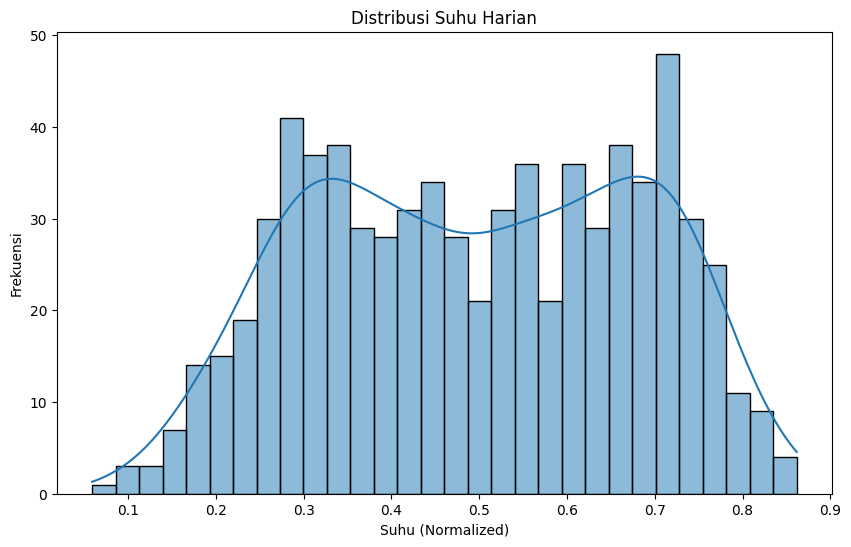

In [28]:
# Histogram untuk Distribusi `cnt` berdasarkan Suhu
plt.figure(figsize=(10, 6))
sns.histplot(day_df['temp'], kde=True, bins=30)
plt.title('Distribusi Suhu Harian')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Frekuensi')
plt.show()

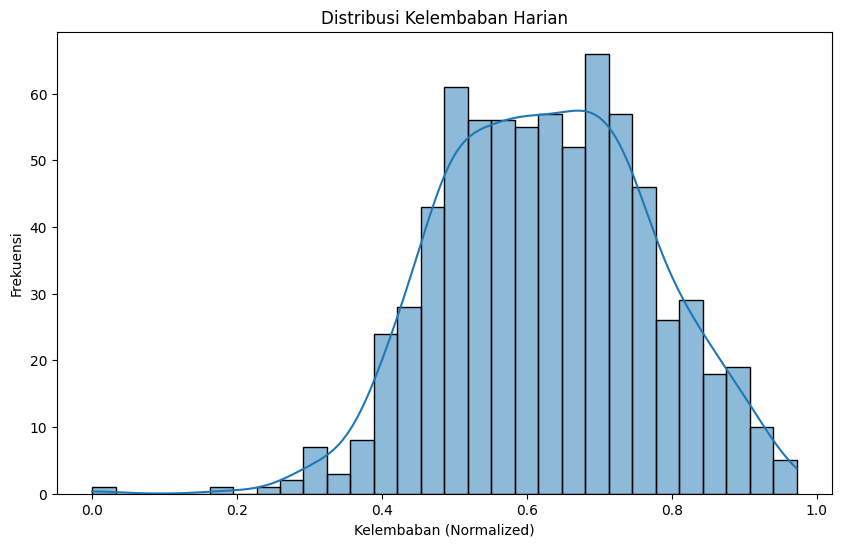

In [29]:
# Histogram untuk Distribusi `cnt` berdasarkan Kelembaban
plt.figure(figsize=(10, 6))
sns.histplot(day_df['hum'], kde=True, bins=30)
plt.title('Distribusi Kelembaban Harian')
plt.xlabel('Kelembaban (Normalized)')
plt.ylabel('Frekuensi')
plt.show()

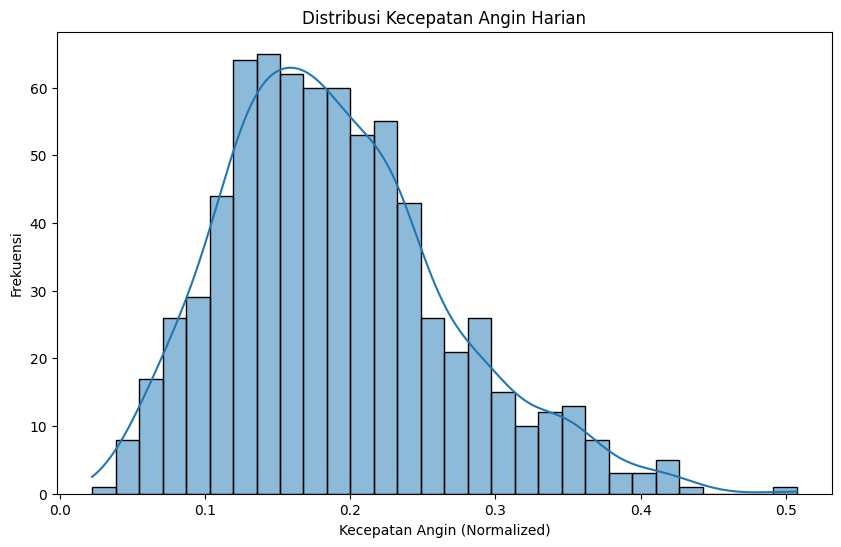

In [30]:
# Histogram untuk Distribusi `cnt` berdasarkan Kecepatan Angin
plt.figure(figsize=(10, 6))
sns.histplot(day_df['windspeed'], kde=True, bins=30)
plt.title('Distribusi Kecepatan Angin Harian')
plt.xlabel('Kecepatan Angin (Normalized)')
plt.ylabel('Frekuensi')
plt.show()

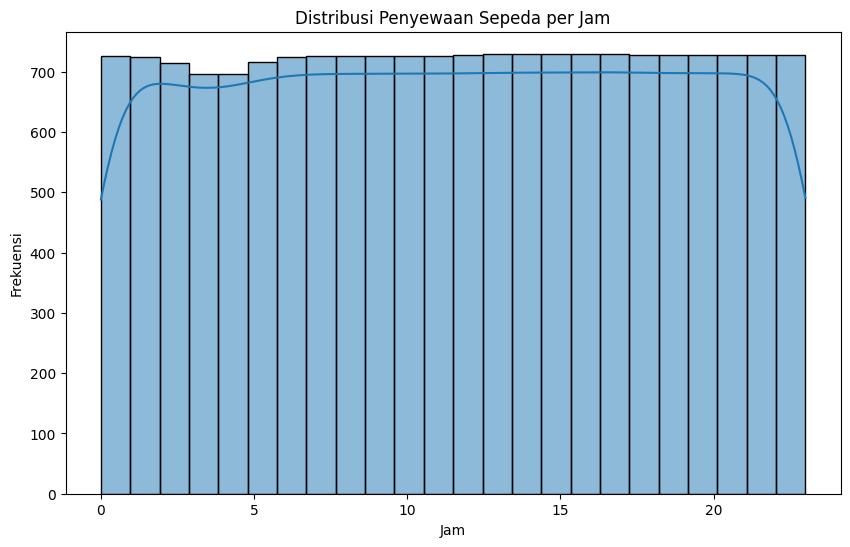

In [31]:
# Pertanyaan Bisnis 2: Perubahan Penggunaan Sepeda Sepanjang Hari
# Histogram untuk Distribusi `cnt` berdasarkan Jam
plt.figure(figsize=(10, 6))
sns.histplot(hour_df['hr'], kde=True, bins=24)
plt.title('Distribusi Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Frekuensi')
plt.show()

#### Data per Hari

In [32]:
# Pisahkan data berdasarkan hari kerja dan akhir pekan
weekday_data = day_df[day_df['workingday'] == 1]
weekend_data = day_df[day_df['workingday'] == 0]

# Hitung rata-rata penggunaan sepeda untuk hari kerja dan akhir pekan
avg_weekday_usage = weekday_data['cnt'].mean()
avg_weekend_usage = weekend_data['cnt'].mean()

# Hitung rata-rata penggunaan sepeda berdasarkan kondisi cuaca untuk hari kerja dan akhir pekan
weekday_weather_usage = weekday_data.groupby('weathersit')['cnt'].mean()
weekend_weather_usage = weekend_data.groupby('weathersit')['cnt'].mean()

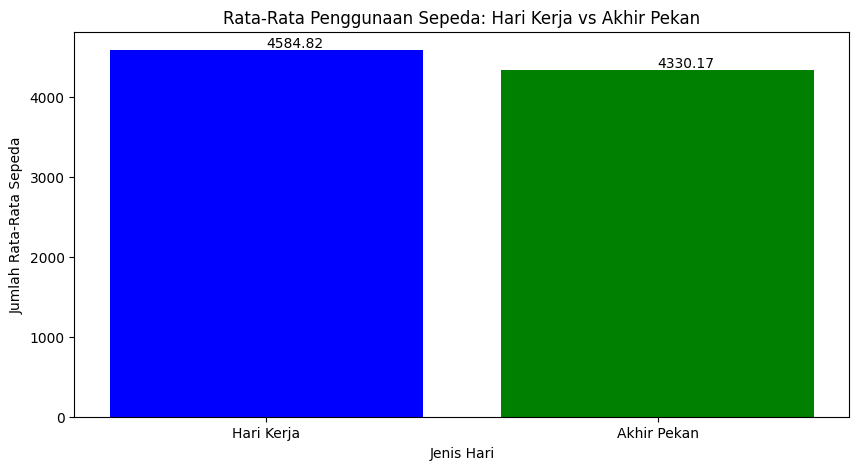

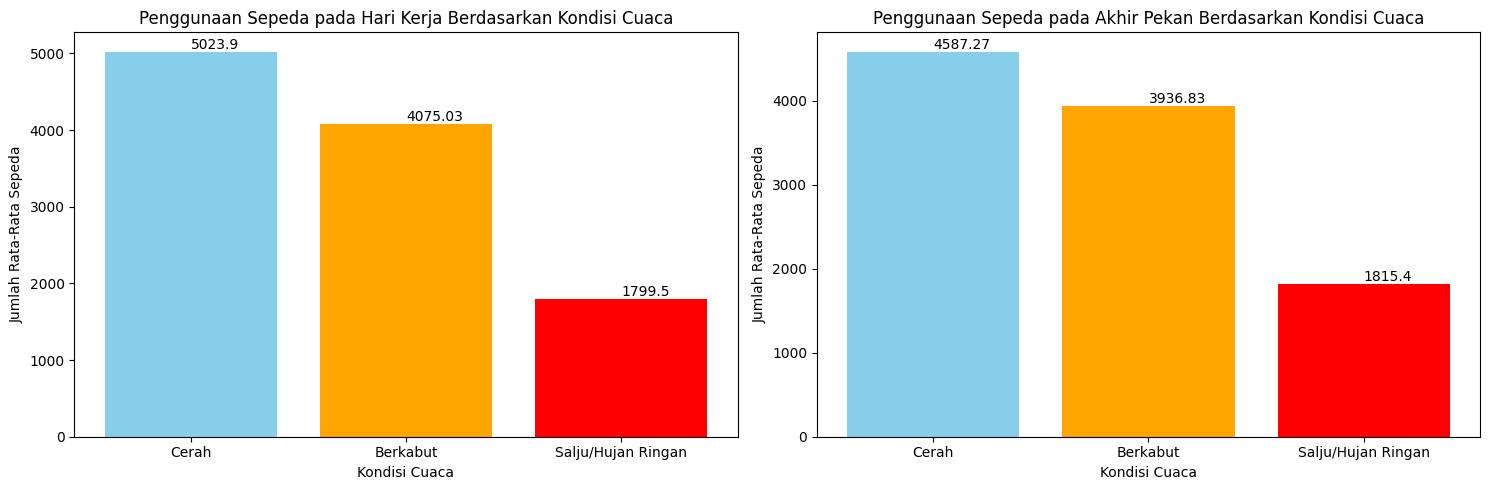

In [33]:
# Visualisasikan penggunaan sepeda rata-rata untuk hari kerja dan akhir pekan
plt.figure(figsize=(10, 5))

# Plot batang untuk penggunaan rata-rata
bars = plt.bar(['Hari Kerja', 'Akhir Pekan'], [avg_weekday_usage, avg_weekend_usage], color=['blue', 'green'])
plt.title('Rata-Rata Penggunaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.ylabel('Jumlah Rata-Rata Sepeda')
plt.xlabel('Jenis Hari')

# Tambahkan nilai pada batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom') # va: vertical alignment

plt.show()

# Visualisasikan pengaruh kondisi cuaca pada penggunaan sepeda untuk hari kerja dan akhir pekan
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Pengaruh cuaca pada hari kerja
bars_weekday = axes[0].bar(weekday_weather_usage.index, weekday_weather_usage.values, color=['skyblue', 'orange', 'red'])
axes[0].set_title('Penggunaan Sepeda pada Hari Kerja Berdasarkan Kondisi Cuaca')
axes[0].set_xlabel('Kondisi Cuaca')
axes[0].set_ylabel('Jumlah Rata-Rata Sepeda')
axes[0].set_xticks([1, 2, 3])
axes[0].set_xticklabels(['Cerah', 'Berkabut', 'Salju/Hujan Ringan'])

# Tambahkan nilai pada batang
for bar in bars_weekday:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Pengaruh cuaca pada akhir pekan
bars_weekend = axes[1].bar(weekend_weather_usage.index, weekend_weather_usage.values, color=['skyblue', 'orange', 'red'])
axes[1].set_title('Penggunaan Sepeda pada Akhir Pekan Berdasarkan Kondisi Cuaca')
axes[1].set_xlabel('Kondisi Cuaca')
axes[1].set_ylabel('Jumlah Rata-Rata Sepeda')
axes[1].set_xticks([1, 2, 3])
axes[1].set_xticklabels(['Cerah', 'Berkabut', 'Salju/Hujan Ringan'])

# Tambahkan nilai pada batang
for bar in bars_weekend:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()


##### Analisis dengan RFM

In [34]:
# Recency (hari terakhir penggunaan sepeda)
last_day = day_df['dteday'].max()

# Frequency (total hari penggunaan)
total_days = day_df['dteday'].nunique()

# Monetary (total penyewaan sepeda)
total_bikes_rented = day_df['cnt'].sum()

# Menyimpan hasil dalam bentuk dictionary
rfm_result = {
    'Recency': last_day,
    'Frequency': total_days,
    'Monetary': total_bikes_rented
}

# Menampilkan hasil RFM
rfm_result

{'Recency': '2012-12-31', 'Frequency': 731, 'Monetary': 3292679}

##### Analisis dengan Clustering

In [35]:
# Mengubah kode hari menjadi nama hari dalam seminggu
day_names = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}
day_df['weekday_name'] = day_df['weekday'].map(day_names)

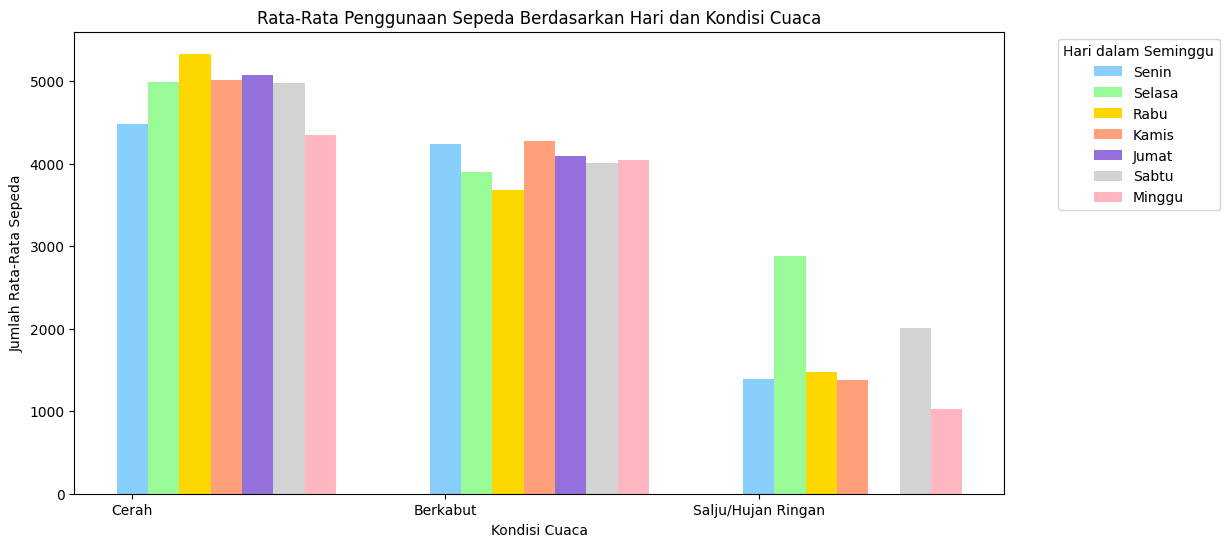

In [36]:
# Mengurutkan data berdasarkan hari dalam seminggu
day_names_ordered = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
day_df['weekday_name'] = pd.Categorical(day_df['weekday_name'], categories=day_names_ordered, ordered=True)
clustered_data = day_df.groupby(['weekday_name', 'weathersit']).agg({'cnt': 'mean'}).reset_index()

# Visualisasikan hasil clustering
plt.figure(figsize=(12, 6))

# Warna untuk setiap hari
soft_colors = ['#87CEFA', '#98FB98', '#FFD700', '#FFA07A', '#9370DB', '#D3D3D3', '#FFB6C1']

# Plot batang untuk setiap kombinasi hari dan kondisi cuaca
for i, day in enumerate(day_names_ordered):
    subset = clustered_data[clustered_data['weekday_name'] == day]
    plt.bar(subset['weathersit'] + (i * 0.1), subset['cnt'], width=0.1, align='center', color=soft_colors[i], label=day)

plt.title('Rata-Rata Penggunaan Sepeda Berdasarkan Hari dan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Rata-Rata Sepeda')
plt.xticks([1, 2, 3], ['Cerah', 'Berkabut', 'Salju/Hujan Ringan'])
plt.legend(title='Hari dalam Seminggu', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Data per Jam

In [37]:
# Mengelompokkan data berdasarkan jam dan menghitung rata-rata penggunaan sepeda
hourly_usage = hour_df.groupby('hr')['cnt'].mean().reset_index()

hourly_usage

,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


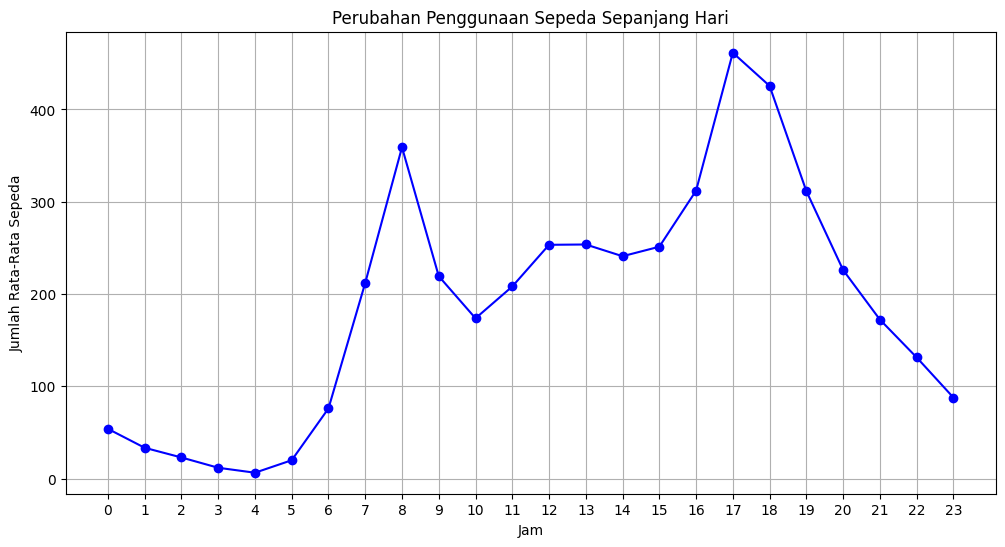

In [38]:
# Visualisasikan perubahan penggunaan sepeda sepanjang hari
plt.figure(figsize=(12, 6))
plt.plot(hourly_usage['hr'], hourly_usage['cnt'], marker='o', linestyle='-', color='b')
plt.title('Perubahan Penggunaan Sepeda Sepanjang Hari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Rata-Rata Sepeda')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana tingkat penggunaan sepeda berdasarkan hari kerja dan akhir pekan di Washington D.C. dengan dipengaruhi oleh kondisi cuaca?

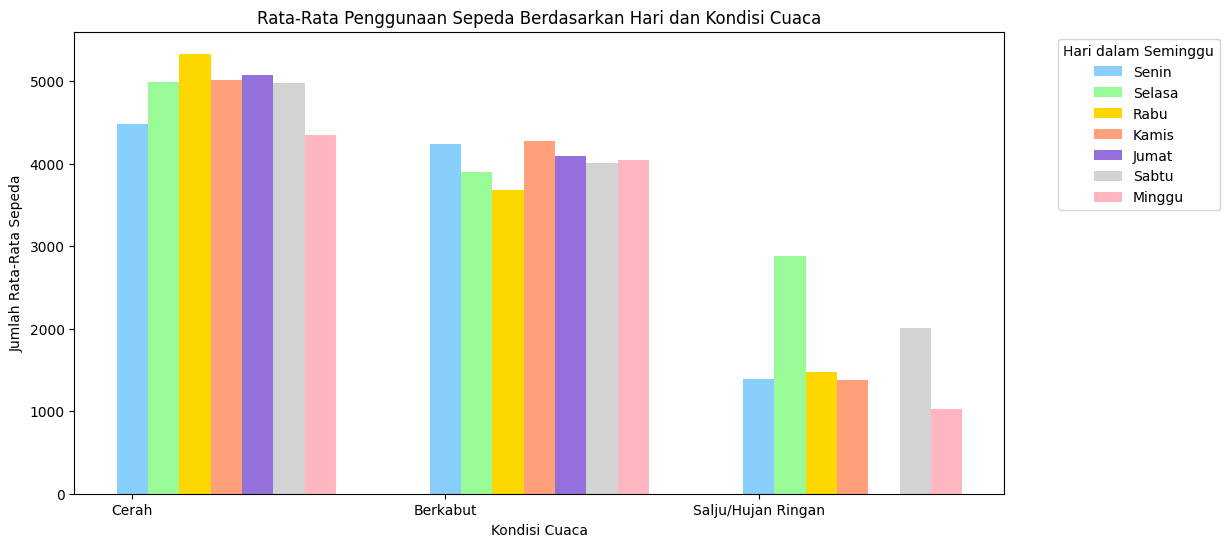

In [39]:
# Mengurutkan data berdasarkan hari dalam seminggu
day_names_ordered = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
day_df['weekday_name'] = pd.Categorical(day_df['weekday_name'], categories=day_names_ordered, ordered=True)
clustered_data = day_df.groupby(['weekday_name', 'weathersit']).agg({'cnt': 'mean'}).reset_index()

# Visualisasikan hasil clustering
plt.figure(figsize=(12, 6))

# Warna untuk setiap hari
soft_colors = ['#87CEFA', '#98FB98', '#FFD700', '#FFA07A', '#9370DB', '#D3D3D3', '#FFB6C1']

# Plot batang untuk setiap kombinasi hari dan kondisi cuaca
for i, day in enumerate(day_names_ordered):
    subset = clustered_data[clustered_data['weekday_name'] == day]
    plt.bar(subset['weathersit'] + (i * 0.1), subset['cnt'], width=0.1, align='center', color=soft_colors[i], label=day)

plt.title('Rata-Rata Penggunaan Sepeda Berdasarkan Hari dan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Rata-Rata Sepeda')
plt.xticks([1, 2, 3], ['Cerah', 'Berkabut', 'Salju/Hujan Ringan'])
plt.legend(title='Hari dalam Seminggu', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

1. Penggunaan Sepeda pada Hari Cerah:
	- Penggunaan sepeda tertinggi terjadi pada hari Rabu, lalu pada Jumat dan Kamis.
	- Hari Minggu memiliki penggunaan sepeda terendah pada hari cerah.
	- Hari kerja cenderung memiliki penggunaan sepeda yang tinggi pada hari cerah, kemungkinan karena banyak orang yang menggunakan sepeda untuk berangkat kerja atau sekolah.

2. Penggunaan Sepeda pada Hari Berkabut:
	- Penggunaan sepeda pada hari berkabut masih cukup tinggi tetapi sedikit lebih rendah dibandingkan hari cerah.
	- Hari Kamis memiliki penggunaan sepeda tertinggi pada hari berkabut, diikuti oleh Senin dan Jumat.
	- Penggunaan sepeda pada hari Rabu menjadi yang terendah, menunjukkan bahwa hari Rabu memiliki penggunaan sepeda yang rendah karena kondisi cuaca.

3. Penggunaan Sepeda pada Hari Salju/Hujan Ringan:
	- Penggunaan sepeda menurun secara signifikan pada kondisi cuaca buruk seperti salju atau hujan ringan.
	- Selasa memiliki penggunaan sepeda tertinggi pada kondisi cuaca ini, diikuti oleh Sabtu.
	- Hari Jumat memiliki penggunaan sepeda terendah pada kondisi cuaca buruk, menunjukkan bahwa cuaca buruk sangat mempengaruhi keputusan orang untuk menggunakan sepeda.

### Pertanyaan 2:

Bagaimana perubahan penggunaan sepeda sepanjang hari atau 24 jam dan apakah ada waktu-waktu puncak tertentu penyewaan sepeda di Washington D.C.?

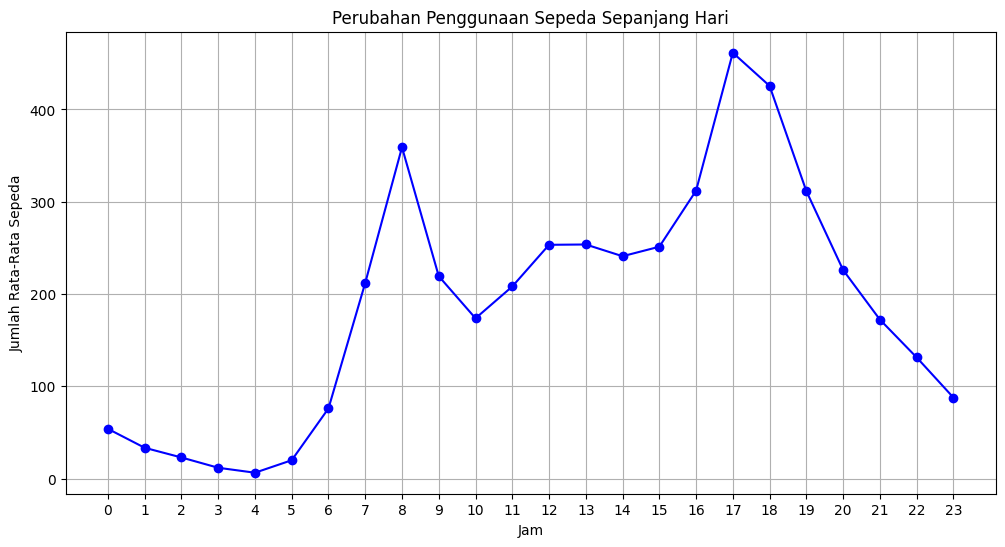

In [40]:
# Visualisasikan perubahan penggunaan sepeda sepanjang hari
plt.figure(figsize=(12, 6))
plt.plot(hourly_usage['hr'], hourly_usage['cnt'], marker='o', linestyle='-', color='b')
plt.title('Perubahan Penggunaan Sepeda Sepanjang Hari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Rata-Rata Sepeda')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

1. Jam Dini Hari (00:00 - 05:00):
	- Penggunaan sepeda sangat rendah selama jam-jam ini, menunjukkan bahwa sangat sedikit orang yang menggunakan sepeda pada dini hari.
	- Ini mungkin karena kebanyakan orang sedang tidur atau tidak melakukan aktivitas yang memerlukan penggunaan sepeda.

2. Jam Pagi (06:00 - 09:00):
	- Terjadi lonjakan penggunaan sepeda mulai sekitar jam 6 pagi, mencapai puncaknya sekitar jam 8 pagi.
	- Puncak ini kemungkinan besar disebabkan oleh orang-orang yang berangkat kerja atau sekolah, menunjukkan bahwa sepeda digunakan sebagai moda transportasi untuk perjalanan pagi.
  
3. Jam Siang (10:00 - 15:00):
	- Penggunaan sepeda menurun setelah jam puncak pagi, namun tetap stabil pada tingkat yang sedang sepanjang jam-jam siang.
	- Ini menunjukkan bahwa sepeda masih digunakan untuk aktivitas siang hari, seperti perjalanan singkat atau makan siang.
  
4. Jam Sore (16:00 - 19:00):
	- Ada lonjakan penggunaan sepeda kedua yang mencapai puncaknya sekitar jam 17-18 sore.
	- Lonjakan ini kemungkinan besar disebabkan oleh orang-orang yang pulang kerja, mirip dengan penggunaan di pagi hari.
  
5. Jam Malam (20:00 - 23:00):
	- Penggunaan sepeda menurun secara signifikan setelah jam 7 malam, dengan jumlah pengguna yang terus menurun hingga tengah malam.
	- Ini menunjukkan bahwa aktivitas malam hari yang melibatkan penggunaan sepeda berkurang drastis, kemungkinan karena kebanyakan orang telah selesai dengan aktivitas sehari-hari mereka.

## Conclusion

1. Penggunaan Sepeda Berdasarkan Hari dan Kondisi Cuaca:
   - Penggunaan sepeda tertinggi terjadi pada hari kerja dengan kondisi cuaca cerah, sementara penggunaan menurun signifikan pada kondisi cuaca buruk (salju/hujan ringan).

2. Perubahan Penggunaan Sepeda Sepanjang Hari:
	- Terdapat dua waktu puncak utama dalam penggunaan sepeda di Washington D.C., yaitu sekitar jam 8-9 pagi dan jam 17-18 sore, mencerminkan perjalanan ke dan dari tempat kerja atau sekolah.